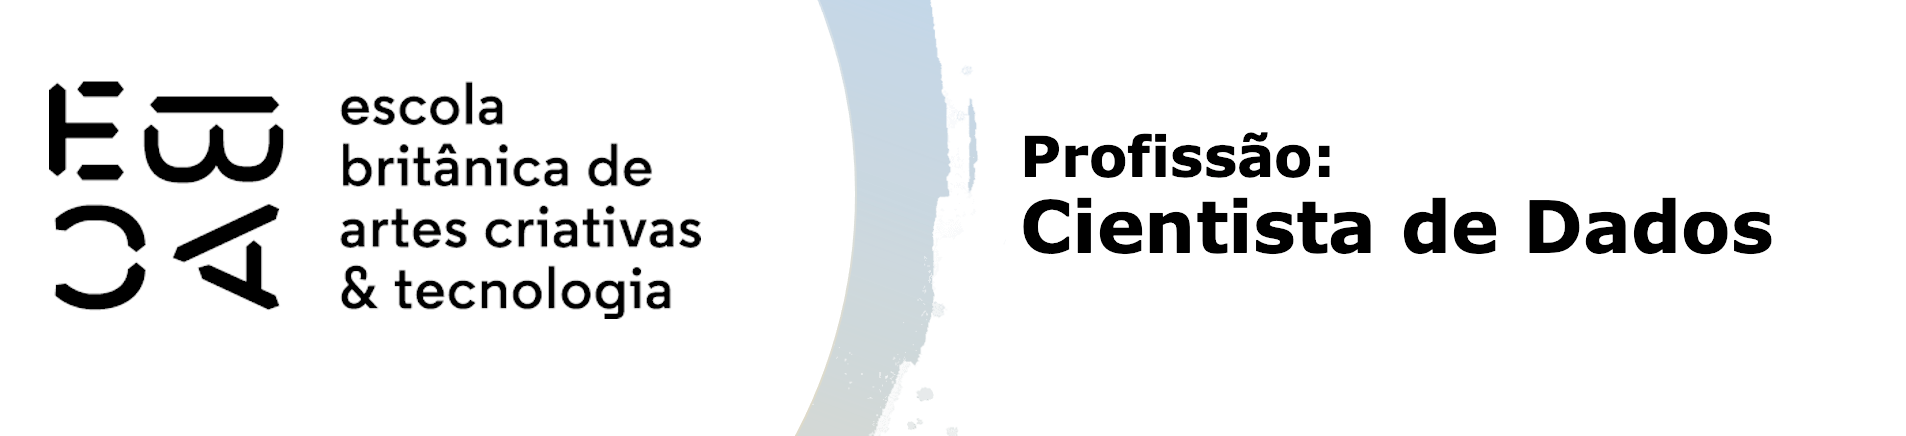

# Métodos hierárquicos de agrupamento - Tarefa

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gower
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc



## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

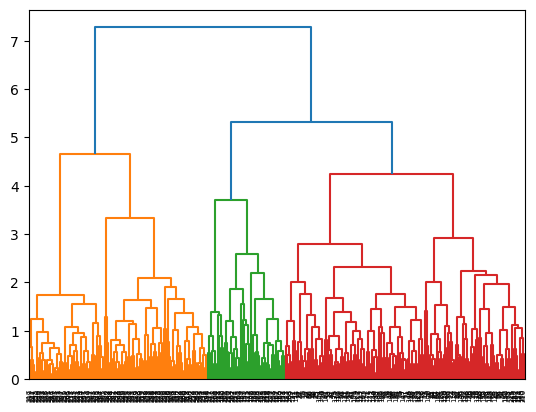

In [24]:
pg = sns.load_dataset("penguins")

pg.index.name = 'id'

#1/2
peng_num = pg.select_dtypes(include='number').dropna()
#3

pad = StandardScaler()
pgpad = pad.fit_transform(peng_num)

#4

clust = AgglomerativeClustering(linkage="complete",
                                 distance_threshold = None,
                                 n_clusters=3)
clust.fit(pgpad)

#add grupos.
peng_num['grupo'] = clust.labels_

dend = shc.dendrogram(shc.linkage(pgpad, method='complete'))

peng = pg.merge(peng_num['grupo'], how='left', on='id')

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

In [25]:
pd.crosstab(peng['species'], peng['grupo'])

grupo,0.0,1.0,2.0
species,,,
Adelie,0,151,0
Chinstrap,0,14,54
Gentoo,123,0,0


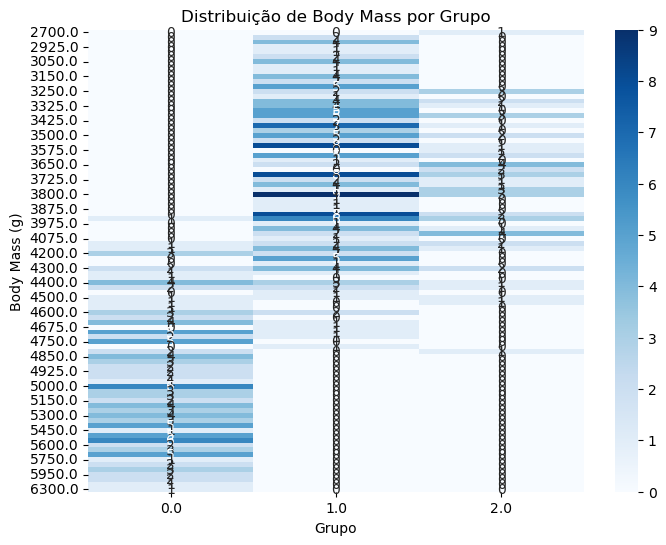

In [36]:
crosstab = pd.crosstab(peng['body_mass_g'], peng['grupo'])

plt.figure(figsize=(8, 6))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='Blues')
plt.title('Distribuição de Body Mass por Grupo')
plt.xlabel('Grupo')
plt.ylabel('Body Mass (g)')
plt.show()

In [37]:
summary = peng.groupby(['grupo', 'species']).describe()

print(summary)

                bill_length_mm                                            \
                         count       mean       std   min     25%    50%   
grupo species                                                              
0.0   Gentoo             123.0  47.504878  3.081857  40.9  45.300  47.30   
1.0   Adelie             151.0  38.791391  2.663405  32.1  36.750  38.80   
      Chinstrap           14.0  44.585714  2.037290  40.9  42.675  45.30   
2.0   Chinstrap           54.0  49.935185  2.659916  45.2  48.200  50.25   

                              bill_depth_mm             ... flipper_length_mm  \
                    75%   max         count       mean  ...               75%   
grupo species                                           ...                     
0.0   Gentoo     49.550  59.6         123.0  14.982114  ...            221.00   
1.0   Adelie     40.750  46.0         151.0  18.346358  ...            195.00   
      Chinstrap  46.300  47.6          14.0  17.850000  ...   

## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

In [46]:
#minha escolha foi 4, o grafico é muito intuitivo é so parar e analisar a dispersão.

clustf = AgglomerativeClustering(linkage="complete",
                                 distance_threshold = None,
                                 n_clusters=4)
clustf.fit(pgpad)




peng_num['grupo4'] = clustf.labels_

peng4 = pg.merge(peng_num['grupo4'], how='left', on='id')

pd.crosstab(peng4['species'], peng4['grupo4'])

grupo4,0.0,1.0,2.0,3.0
species,,,,
Adelie,151,0,0,0
Chinstrap,14,0,54,0
Gentoo,0,71,0,52


In [49]:
pd.crosstab(peng4['sex'], peng4['grupo4'])

grupo4,0.0,1.0,2.0,3.0
sex,,,,
Female,87,9,20,49
Male,73,61,34,0


# Aparentemente padrao apenas na parte de species, onde ele conseguiu separar completamente o adelie, o chinstrap um pouco, ja o gentoo ficou entre o grupo1 e 3>

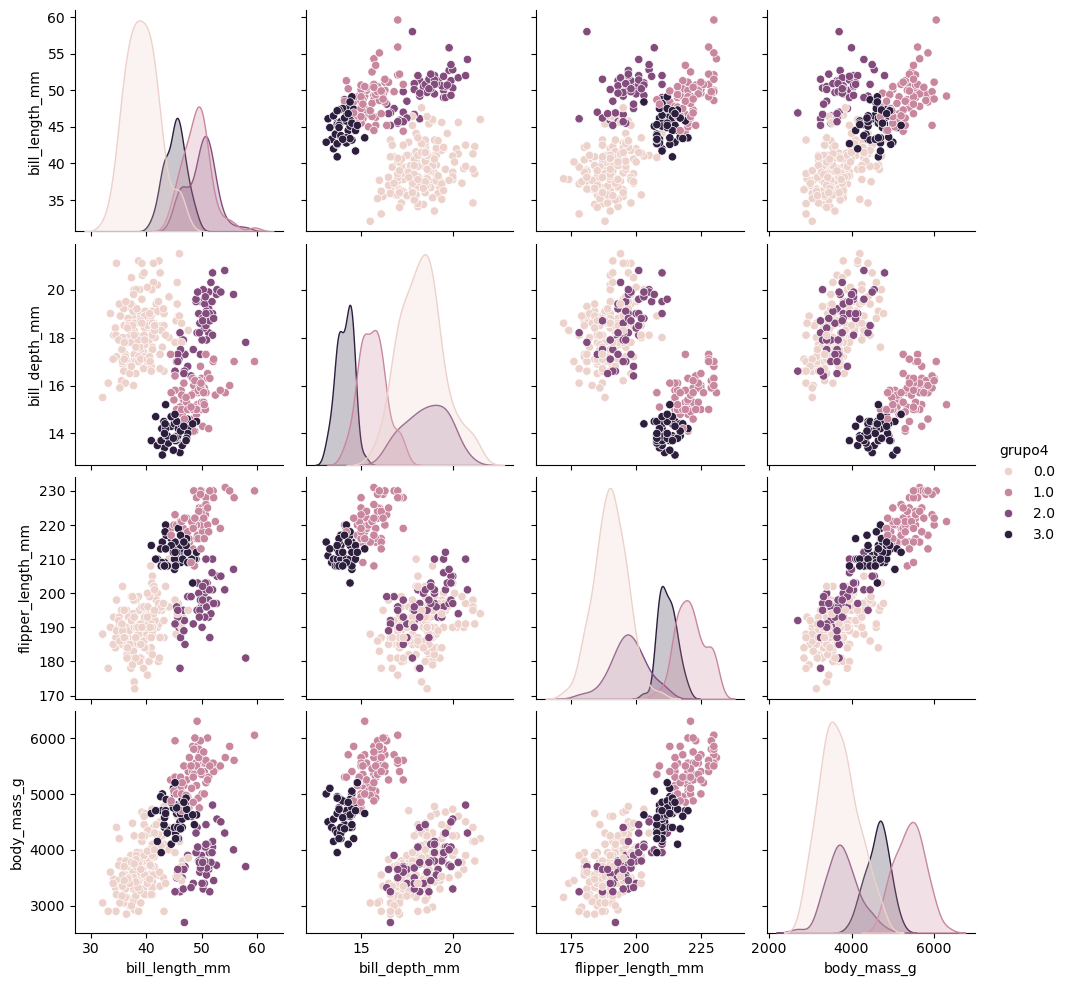

In [50]:
sns.pairplot(data=peng4, hue='grupo4')